#### Importing necessary modules

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

This imports the necessary libraries (pandas  and numpy for data manipulation and datetime for date handling) and loads the dataset into a pandas DataFrame.

#### Data Call

In [2]:
df=pd.read_csv('messy_data.csv')
df

,Unnamed: 0,ID,Name,Age,Email,Join Date,Salary,Department
0,0,1e407ff9-6255-489d-a0de-34135d4f74bd,Hunter Thomas,25.0,xlopez@hotmail.com,NaN,88552.000000,Sales
1,1,379f55b8-87d5-4739-a146-7400b78c24d1,Jeremy Irwin,90.0,Jillian Jenkins,2022-07-07,139227.000000,NaN
2,2,18261368-dfa1-47f0-afc6-bddf45926b07,Jennifer Hammondquickly,66.0,jscottgreen.biz,2023-11-21,65550.000000,Engineering
3,3,ae7cf7cf-17cf-4c8b-9c44-4f61a9a238e5,Sydney Taylorso,39.0,luke56gonzalez.com,2021-11-05,139932.000000,SupportJ
4,4,14ed3e6a-e0f5-4bbe-8d93-8665267f5c90,Julia Lee,71.0,figueroakayla@yahoo.com,NaN,143456.000000,Marketing
...,...,...,...,...,...,...,...,...
10995,6523,07c223be-03e6-4f70-a2b5-86df778cc61a,NaN,NaN,NaN,NaN,NaN,NaN
10996,9785,da8a6bbc-5026-4630-848d-f64e80dac56c,Steven Armstrong,38.0,molly89gmail.com,2021-06-24,NaN,Sales
10997,7826,ed19c966-d6d8-4047-b410-b6e595a39340,Stephanie Riossell,NaN,robert96@pollard-frye.com,15/08/2006,122609.594149,HR
10998,7648,783b36b4-d09f-46c9-8a52-7ff96b80863e,Bonnie Benitez,37.0,roypark@warren.net,2020-10-09,147322.005171,Support


#### Data Pre-processing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  11000 non-null  int64  
 1   ID          11000 non-null  object 
 2   Name        8667 non-null   object 
 3   Age         9253 non-null   float64
 4   Email       9731 non-null   object 
 5   Join Date   8808 non-null   object 
 6   Salary      8761 non-null   float64
 7   Department  8745 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 687.6+ KB


In [4]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Email', 'Join Date', 'Salary',
       'Department'],
      dtype='object')

In [5]:
df['Unnamed: 0'].unique()

array([   0,    1,    2, ..., 9997, 9998, 9999], dtype=int64)

In [6]:
# Drop the 'Unnamed: 0' column 
df = df.drop(columns=['Unnamed: 0'])

This column is often created when a DataFrame with an index is saved to a CSV file and then reloaded.

In [7]:
df.dtypes

ID             object
Name           object
Age           float64
Email          object
Join Date      object
Salary        float64
Department     object
dtype: object

In [8]:
#checking for missing values
df.isnull().sum()

ID               0
Name          2333
Age           1747
Email         1269
Join Date     2192
Salary        2239
Department    2255
dtype: int64

In [9]:
# 1.Handling Missing values

In [10]:
# Drop rows where both 'Name' and 'Email' are missing
df = df.dropna(subset=['Name', 'Email'], how='all')

Drops rows where both Name and Email are missing since these are critical fields for identifying individuals.

In [11]:
#missing values in numerical columns
# Impute missing 'Age' with the median
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Age'] = df['Age'].fillna(df['Age'].median())

Converts the Age column to numeric, coercing any errors to NaN, and then fills missing values with the median age.

If the Age column contains any non-numeric values (such as strings or other invalid entries), converting to numeric will coerce these invalid entries to NaN. This is crucial for data cleaning because it allows us to identify and handle these anomalies.

In [12]:
# Convert 'Join Date' to datetime and fill missing with the median date
df['Join Date'] = pd.to_datetime(df['Join Date'], errors='coerce')
median_date = df['Join Date'].median()
df['Join Date'] = df['Join Date'].fillna(median_date)

Converts the Join Date column to datetime, coercing any errors to NaN, and then fills missing values with the median date.

In [13]:
# Impute missing 'Salary' with the median salary
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')
df['Salary'] = df['Salary'].fillna(df['Salary'].median())

In [14]:
df['Department'].unique()

array(['Sales', nan, 'Engineering', 'SupportJ', 'Marketing', 'SupportE',
       'HR', 'Support', 'HRC', 'SalesA', 'SalesX', 'Supportu',
       'Engineeringi', 'MarketingR', 'Salesw', 'SalesK', 'MarketingU',
       'Salesi', 'HRa', 'SalesG', 'Supporty', 'SalesN', 'Marketinge',
       'Marketingv', 'HRv', 'SalesM', 'EngineeringL', 'MarketingQ', 'HRs',
       'SalesW', 'Supportj', 'Salesd', 'Marketingu', 'Engineeringj',
       'SalesU', 'HRO', 'MarketingH', 'Salesj', 'Saleso', 'SalesZ',
       'Engineeringe', 'MarketingF', 'Marketingr', 'Engineeringm', 'HRW',
       'HRt', 'HRz', 'Engineeringp', 'HRF', 'EngineeringS', 'SupportW',
       'EngineeringT', 'SalesC', 'SalesB', 'SupportC', 'SalesY',
       'Marketingn', 'EngineeringK', 'Marketingz', 'HRo', 'SupportB',
       'HRi', 'Salest', 'Supportg', 'Supporta', 'HRn', 'SupportQ',
       'Salesr', 'EngineeringG', 'Supportm', 'Supporto', 'EngineeringH',
       'Marketingw', 'EngineeringM', 'Supportz', 'HRr', 'Salesy',
       'MarketingD', 'HR

In [15]:
# Impute missing 'Department' with the mode or 'Unknown'
df['Department'] = df['Department'].fillna(df['Department'].mode()[0])

Fills missing values in the Department column with the most frequent department (mode).

The mode function may returns a series of modes , there could be multiple modes and there will be a tie . In such situation we choose the first occuring as the mode for the we use '[0]'.It selects the first mode in case there is a tie

To determine which department names are correct and which ones are incorrect, you can follow a systematic approach that involves analyzing the unique values in the Department column, identifying obvious typos or inconsistencies, and potentially cross-referencing with a list of valid department names

In [16]:
# List unique department names
unique_departments = df['Department'].unique()
print("Unique departments before cleaning:")
print(unique_departments)

Unique departments before cleaning:
['Sales' 'Support' 'Engineering' 'SupportJ' 'Marketing' 'SupportE' 'HR'
 'HRC' 'SalesA' 'SalesX' 'Supportu' 'Engineeringi' 'MarketingR' 'Salesw'
 'SalesK' 'MarketingU' 'Salesi' 'HRa' 'SalesG' 'Supporty' 'SalesN'
 'Marketinge' 'Marketingv' 'HRv' 'SalesM' 'EngineeringL' 'MarketingQ'
 'HRs' 'SalesW' 'Supportj' 'Salesd' 'Marketingu' 'Engineeringj' 'SalesU'
 'HRO' 'MarketingH' 'Salesj' 'Saleso' 'SalesZ' 'Engineeringe' 'MarketingF'
 'Marketingr' 'Engineeringm' 'HRW' 'HRt' 'HRz' 'Engineeringp' 'HRF'
 'EngineeringS' 'SupportW' 'EngineeringT' 'SalesC' 'SalesB' 'SupportC'
 'SalesY' 'Marketingn' 'EngineeringK' 'Marketingz' 'HRo' 'SupportB' 'HRi'
 'Salest' 'Supportg' 'Supporta' 'HRn' 'SupportQ' 'Salesr' 'EngineeringG'
 'Supportm' 'Supporto' 'EngineeringH' 'Marketingw' 'EngineeringM'
 'Supportz' 'HRr' 'Salesy' 'MarketingD' 'HRE' 'Marketingm' 'HRw'
 'Marketingo' 'Supportk' 'MarketingN' 'SupportS' 'EngineeringD'
 'Marketingp' 'Salesl' 'MarketingI' 'MarketingL' 'Sup

In [17]:
#mapping of incorrect to correct department names
department_mapping = {
    'SupportJ': 'Support', 'SupportE': 'Support', 'Supportu': 'Support', 'Supporty': 'Support', 
    'Supportj': 'Support', 'Supportg': 'Support', 'Supporta': 'Support', 'SupportQ': 'Support', 
    'Supportm': 'Support', 'Supporto': 'Support', 'Supportz': 'Support', 'Supportk': 'Support', 
    'SupportS': 'Support', 'SupportW': 'Support', 'SupportC': 'Support', 'SupportB': 'Support', 
    'Supportv': 'Support', 'SupportA': 'Support', 'Supporte': 'Support', 'SupportT': 'Support', 
    'Supportd': 'Support', 'Supportl': 'Support', 'SupportX': 'Support', 'Supporti': 'Support', 
    'Supportw': 'Support', 'SupportL': 'Support', 'Supportp': 'Support', 'SupportO': 'Support', 
    'SupportH': 'Support', 'Supporth': 'Support', 'SupportZ': 'Support', 'Supportq': 'Support', 
    'Supportr': 'Support', 'SupportI': 'Support', 'SupportV': 'Support', 'Supportt': 'Support', 
    'SupportP': 'Support', 'Supportf': 'Support', 'Supportn': 'Support', 'SupportG': 'Support', 
    'SupportK': 'Support', 'SupportN': 'Support', 'SupportR': 'Support', 'SupportU': 'Support', 
    'SupportM': 'Support', 'SupportF': 'Support', 'Supports': 'Support', 'Supportc': 'Support', 
    'SupportD': 'Support', 'SupportY': 'Support', 'Supportb': 'Support', 'Supportx': 'Support',

    'SalesA': 'Sales', 'SalesX': 'Sales', 'Salesw': 'Sales', 'SalesK': 'Sales', 
    'Salesi': 'Sales', 'SalesG': 'Sales', 'SalesN': 'Sales', 'SalesM': 'Sales', 
    'SalesW': 'Sales', 'Salesd': 'Sales', 'SalesU': 'Sales', 'Salesj': 'Sales', 
    'Saleso': 'Sales', 'SalesZ': 'Sales', 'Salesl': 'Sales', 'SalesF': 'Sales', 
    'Salesz': 'Sales', 'SalesT': 'Sales', 'Salesg': 'Sales', 'Salesc': 'Sales', 
    'SalesR': 'Sales', 'Salesy': 'Sales', 'SalesD': 'Sales', 'SalesE': 'Sales', 
    'SalesI': 'Sales', 'Salesu': 'Sales', 'SalesS': 'Sales', 'Salesv': 'Sales', 
    'Salesq': 'Sales', 'SalesP': 'Sales', 'Salesx': 'Sales', 'Salesm': 'Sales', 
    'Salest': 'Sales', 'Salesa': 'Sales', 'Salesf': 'Sales', 'Salesh': 'Sales', 
    'Salesb': 'Sales', 'SalesQ': 'Sales', 'SalesJ': 'Sales', 'SalesL': 'Sales', 
    'Salesp': 'Sales', 'Salese': 'Sales', 'Saless': 'Sales', 'SalesO': 'Sales',

    'Engineeringi': 'Engineering', 'EngineeringL': 'Engineering', 'Engineeringj': 'Engineering', 
    'Engineeringe': 'Engineering', 'Engineeringm': 'Engineering', 'Engineeringp': 'Engineering', 
    'EngineeringS': 'Engineering', 'EngineeringT': 'Engineering', 'EngineeringK': 'Engineering', 
    'Engineeringj': 'Engineering', 'EngineeringD': 'Engineering', 'EngineeringG': 'Engineering', 
    'EngineeringH': 'Engineering', 'EngineeringM': 'Engineering', 'EngineeringQ': 'Engineering', 
    'Engineeringb': 'Engineering', 'EngineeringX': 'Engineering', 'Engineeringc': 'Engineering', 
    'Engineeringh': 'Engineering', 'Engineeringv': 'Engineering', 'Engineeringw': 'Engineering', 
    'EngineeringP': 'Engineering', 'Engineeringo': 'Engineering', 'EngineeringN': 'Engineering', 
    'Engineeringl': 'Engineering', 'Engineeringf': 'Engineering', 'Engineeringy': 'Engineering', 
    'EngineeringU': 'Engineering', 'Engineeringa': 'Engineering', 'Engineeringd': 'Engineering', 
    'Engineerings': 'Engineering', 'EngineeringR': 'Engineering', 'Engineeringk': 'Engineering', 
    'EngineeringC': 'Engineering', 'Engineeringz': 'Engineering', 'EngineeringF': 'Engineering', 
    'EngineeringJ': 'Engineering', 'Engineeringx': 'Engineering', 'Engineeringr': 'Engineering', 
    'Engineeringq': 'Engineering', 'EngineeringA': 'Engineering', 'Engineeringu': 'Engineering', 
    'EngineeringO': 'Engineering', 'EngineeringB': 'Engineering', 'EngineeringE': 'Engineering', 
    'EngineeringI': 'Engineering', 'EngineeringZ': 'Engineering', 'EngineeringV': 'Engineering', 
    'Engineeringn': 'Engineering',

    'MarketingR': 'Marketing', 'MarketingU': 'Marketing', 'Marketinge': 'Marketing', 
    'Marketingv': 'Marketing', 'MarketingQ': 'Marketing', 'Marketingu': 'Marketing', 
    'MarketingH': 'Marketing', 'MarketingF': 'Marketing', 'Marketingr': 'Marketing', 
    'Marketingm': 'Marketing', 'Marketingw': 'Marketing', 'MarketingI': 'Marketing', 
    'MarketingL': 'Marketing', 'MarketingO': 'Marketing', 'Marketingt': 'Marketing', 
    'Marketingp': 'Marketing', 'Marketingk': 'Marketing', 'Marketingi': 'Marketing', 
    'MarketingD': 'Marketing', 'Marketingo': 'Marketing', 'MarketingN': 'Marketing', 
    'Marketingf': 'Marketing', 'Marketingl': 'Marketing', 'Marketingh': 'Marketing', 
    'MarketingC': 'Marketing', 'Marketingg': 'Marketing', 'MarketingB': 'Marketing', 
    'Marketingy': 'Marketing', 'Marketinga': 'Marketing', 'Marketingz': 'Marketing', 
    'Marketingn': 'Marketing', 'MarketingQ': 'Marketing', 'MarketingV': 'Marketing', 
    'Marketingd': 'Marketing', 'MarketingS': 'Marketing', 'MarketingT': 'Marketing', 
    'MarketingZ': 'Marketing', 'Marketingx': 'Marketing', 'MarketingK': 'Marketing', 
    'MarketingJ': 'Marketing', 'MarketingW': 'Marketing', 'MarketingX': 'Marketing', 
    'MarketingP': 'Marketing', 'MarketingA': 'Marketing', 'MarketingG': 'Marketing',

    'HRC': 'HR', 'HRa': 'HR', 'HRv': 'HR', 'HRs': 'HR', 
    'HRO': 'HR', 'HRF': 'HR', 'HRo': 'HR', 'HRi': 'HR', 
    'HRn': 'HR', 'HRW': 'HR', 'HRt': 'HR', 'HRz': 'HR', 
    'HRr': 'HR', 'HRw': 'HR', 'HRU': 'HR', 'HRL': 'HR', 
    'HRI': 'HR', 'HRD': 'HR', 'HRQ': 'HR', 'HRy': 'HR', 
    'HRm': 'HR', 'HRE': 'HR', 'HRk': 'HR', 'HRp': 'HR', 
    'HRg': 'HR', 'HRM': 'HR', 'HRX': 'HR', 'HRl': 'HR', 
    'HRG': 'HR', 'HRB': 'HR', 'HRV': 'HR', 'HRS': 'HR', 
    'HRx': 'HR', 'HRc': 'HR', 'HRj': 'HR', 'HRd': 'HR', 
    'HRA': 'HR', 'HRP': 'HR', 'HRZ': 'HR', 'HRh': 'HR', 
    'HRH': 'HR', 'HRN': 'HR', 'HRJ': 'HR', 'HRR': 'HR', 
    'HRu': 'HR', 'HRK': 'HR', 'HRf': 'HR', 'HRk': 'HR',
    'HRe': 'HR'
}

use the replace method to update the Department column with the correct names:

In [18]:
df['Department'] = df['Department'].replace(department_mapping)

# Check the unique values after replacement
final_unique_departments = df['Department'].unique()
print("Unique departments after cleaning:")
print(final_unique_departments)

Unique departments after cleaning:
['Sales' 'Support' 'Engineering' 'Marketing' 'HR' 'SalesC' 'SalesB'
 'SalesY' 'Salesr' 'Salesn' 'Engineeringg' 'MarketingE' 'SalesV' 'HRT'
 'Engineeringt' 'Salesk' 'SalesH' 'HRq' 'Marketingb' 'Marketings'
 'Marketingq' 'EngineeringW' 'Marketingj' 'HRY' 'MarketingY' 'HRb'
 'Marketingc' 'MarketingM']


There are still some department names that are not corrected.

In [19]:
#the remaining department names that need to be corrected:
remaining_incorrect_departments = [
    'SalesC', 'SalesB', 'SalesY', 'Salesr', 'Salesn', 'Engineeringg', 
    'MarketingE', 'SalesV', 'HRT', 'Engineeringt', 'Salesk', 'SalesH', 
    'HRq', 'Marketingb', 'Marketings', 'Marketingq', 'EngineeringW', 
    'Marketingj', 'HRY', 'MarketingY', 'HRb', 'Marketingc', 'MarketingM'
]
print("Remaining incorrect departments:")
print(remaining_incorrect_departments)

Remaining incorrect departments:
['SalesC', 'SalesB', 'SalesY', 'Salesr', 'Salesn', 'Engineeringg', 'MarketingE', 'SalesV', 'HRT', 'Engineeringt', 'Salesk', 'SalesH', 'HRq', 'Marketingb', 'Marketings', 'Marketingq', 'EngineeringW', 'Marketingj', 'HRY', 'MarketingY', 'HRb', 'Marketingc', 'MarketingM']


In [20]:
#new mappings based on the observed patterns:
additional_department_mapping = {
    'SalesC': 'Sales', 'SalesB': 'Sales', 'SalesY': 'Sales', 'Salesr': 'Sales', 
    'Salesn': 'Sales', 'Engineeringg': 'Engineering', 'MarketingE': 'Marketing', 
    'SalesV': 'Sales', 'HRT': 'HR', 'Engineeringt': 'Engineering', 'Salesk': 'Sales', 
    'SalesH': 'Sales', 'HRq': 'HR', 'Marketingb': 'Marketing', 'Marketings': 'Marketing', 
    'Marketingq': 'Marketing', 'EngineeringW': 'Engineering', 'Marketingj': 'Marketing', 
    'HRY': 'HR', 'MarketingY': 'Marketing', 'HRb': 'HR', 'Marketingc': 'Marketing', 
    'MarketingM': 'Marketing'
}

# Combine with the original dictionary
department_mapping.update(additional_department_mapping)


In [21]:
#the updated dictionary to clean the Department column:
df['Department'] = df['Department'].replace(department_mapping)

# Check the unique values after the final replacement
final_unique_departments = df['Department'].unique()
print("Unique departments after final cleaning:")
print(final_unique_departments)

Unique departments after final cleaning:
['Sales' 'Support' 'Engineering' 'Marketing' 'HR']


The issue with the department names persisting after the initial corrections might be due to a few reasons, such as case sensitivity, leading/trailing spaces, or not fully covering all variations.

Strip Leading/Trailing Spaces:
Remove any leading or trailing spaces from the department names.

Normalize Case:
Convert all department names to lowercase or uppercase to ensure consistency.

Review Remaining Unique Department Names:
Identify any remaining incorrect department names and their correct counterparts.

Update the Mapping Dictionary:
Ensure all potential variations are covered.

Apply the Updated Mapping to the DataFrame:
Clean the Department column using the comprehensive mapping dictionary.

In [22]:
additional_department_mapping = {
    'SalesC': 'Sales', 'SalesB': 'Sales', 'SalesY': 'Sales', 'Salesr': 'Sales', 
    'Salesn': 'Sales', 'SalesV': 'Sales', 'Salesk': 'Sales', 'SalesH': 'Sales',
    'Engineeringg': 'Engineering', 'Engineeringt': 'Engineering', 'EngineeringW': 'Engineering',
    'MarketingE': 'Marketing', 'Marketingb': 'Marketing', 'Marketings': 'Marketing', 
    'Marketingq': 'Marketing', 'Marketingj': 'Marketing', 'MarketingY': 'Marketing',
    'Marketingc': 'Marketing', 'MarketingM': 'Marketing',
    'HRT': 'HR', 'HRq': 'HR', 'HRY': 'HR', 'HRb': 'HR'
}

# Combine with the original dictionary
department_mapping.update(additional_department_mapping)

In [23]:
df['Department'] = df['Department'].replace(department_mapping)

# Check the unique values after the final replacement
final_unique_departments = df['Department'].unique()
print("Unique departments after final cleaning:")
print(final_unique_departments)

Unique departments after final cleaning:
['Sales' 'Support' 'Engineering' 'Marketing' 'HR']


In [24]:
df['Department'].unique()

array(['Sales', 'Support', 'Engineering', 'Marketing', 'HR'], dtype=object)

In [25]:
#Ensuring the datatypes
# Ensure 'Join Date' is datetime
df['Join Date'] = pd.to_datetime(df['Join Date'], errors='coerce')

# Ensure 'Age' and 'Salary' are numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')

Ensures the Join Date column is of datetime type and Age and Salary columns are numeric.

error = coerce , means coercing any error to NaN ,and dealing with it

##### Outliers detection and removal

detect outliers in the  dataset, focusing on numeric columns like Age and Salary.

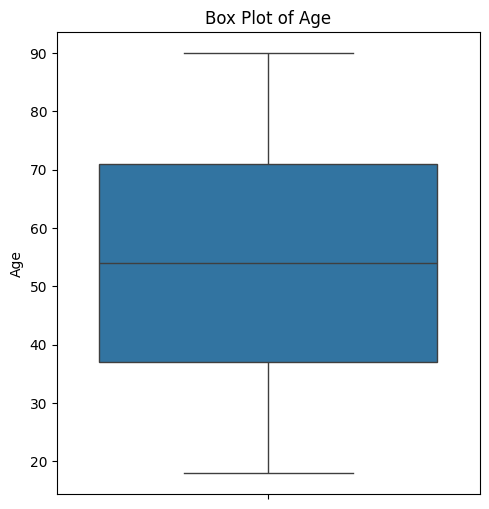

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
# Box plot for Age
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Age'])
plt.title('Box Plot of Age')
plt.show()

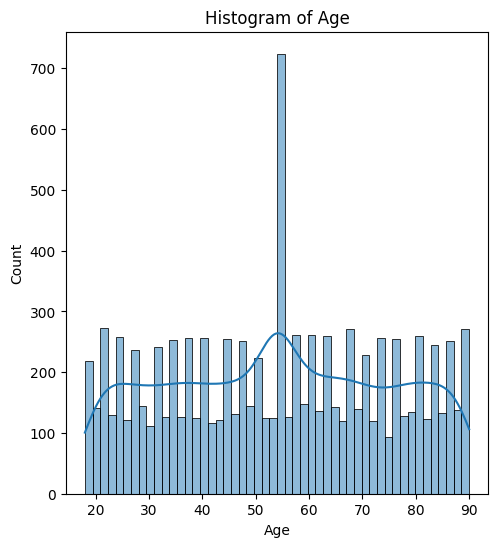

In [27]:
# Histogram for Age
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=50, kde=True)
plt.title('Histogram of Age')
plt.show()

In [28]:
# Calculate IQR for Age and Salary
Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

In [29]:
# Define bounds for outliers
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

In [30]:
# Identify outliers based on IQR
age_outliers = df[(df['Age'] < lower_bound_age) | (df['Age'] > upper_bound_age)]
print("Number of Age Outliers (IQR):", len(age_outliers))

Number of Age Outliers (IQR): 0


If there are no points outside the boxplot whiskers, it means that there are no outliers based on the Interquartile Range (IQR) method.

Handle Salary Noise:
- Identify and handle any noise in the 'Salary' column. Ensure salary values are within a reasonable range and free from random fluctuations.

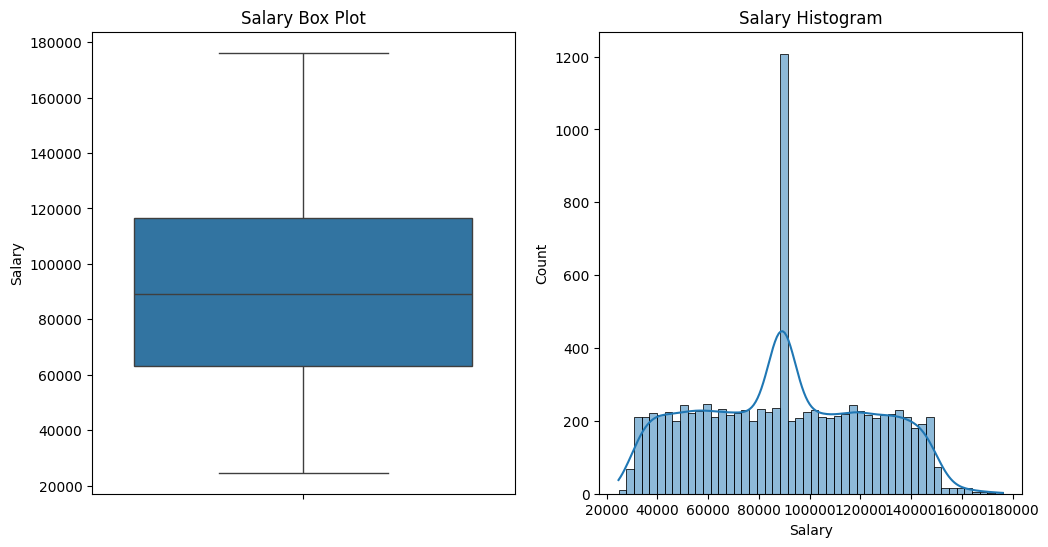

In [31]:
# Plot the distribution of the Salary column
plt.figure(figsize=(12, 6))

# Box plot
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Salary'])
plt.title('Salary Box Plot')

# Histogram
plt.subplot(1, 2, 2)
sns.histplot(df['Salary'], bins=50, kde=True)
plt.title('Salary Histogram')

plt.show()

In [32]:
Q1_salary = df['Salary'].quantile(0.25)
Q3_salary = df['Salary'].quantile(0.75)
IQR_salary = Q3_salary - Q1_salary

In [33]:
# Define bounds for outliers
lower_bound_salary = Q1_salary - 1.5 * IQR_salary
upper_bound_salary = Q3_salary + 1.5 * IQR_salary

In [34]:
# Identify outliers based on IQR
salary_outliers = df[(df['Salary'] < lower_bound_salary) | (df['Age'] > upper_bound_salary)]
print("Number of salary Outliers (IQR):", len(salary_outliers))

Number of salary Outliers (IQR): 0


In [35]:
df['Salary']

0         88552.000000
1        139227.000000
2         65550.000000
3        139932.000000
4        143456.000000
             ...      
10994    147555.000000
10996     89241.000000
10997    122609.594149
10998    147322.005171
10999    149224.000000
Name: Salary, Length: 9731, dtype: float64

salary values are floating-point numbers with a high precision, which might not be necessary for salary data. Typically, salaries are represented as whole numbers or with two decimal places for cents.

Round Salary Values: Convert salary values to a consistent format with two decimal places.

Check for Logical Range: Ensure the salary values are within a reasonable range (e.g., no negative values or excessively high values that don't make sense in context).

In [36]:
# Get basic statistics
mean_salary = df['Salary'].mean()
median_salary = df['Salary'].median()
std_salary = df['Salary'].std()
q1_salary = df['Salary'].quantile(0.25)
q3_salary = df['Salary'].quantile(0.75)
iqr_salary = q3_salary - q1_salary

In [37]:
# Define boundaries using IQR
lower_bound_iqr = q1_salary - 1.5 * iqr_salary
upper_bound_iqr = q3_salary + 1.5 * iqr_salary

In [38]:
# Alternatively, define boundaries using standard deviation
lower_bound_std = mean_salary - 3 * std_salary
upper_bound_std = mean_salary + 3 * std_salary

In [39]:
# Choose which boundaries to use based on the analysis
lower_bound = max(lower_bound_iqr, lower_bound_std)
upper_bound = min(upper_bound_iqr, upper_bound_std)

In [40]:
# Apply boundaries to the salary column
df['Salary'] = df['Salary'].apply(lambda x: min(max(x, lower_bound), upper_bound))


In [41]:
# Checking the results
print(df['Salary'].describe())

count      9731.000000
mean      89822.232174
std       33111.791150
min       24655.136613
25%       63020.176853
50%       89241.000000
75%      116399.000000
max      176156.206747
Name: Salary, dtype: float64


Check whether the above capping has effected the salary

In [42]:
# Count values outside boundaries
below_lower_bound = df[df['Salary'] < lower_bound].shape[0]
above_upper_bound = df[df['Salary'] > upper_bound].shape[0]

print(f"Number of salaries below {lower_bound}: {below_lower_bound}")
print(f"Number of salaries above {upper_bound}: {above_upper_bound}")

Number of salaries below -9513.141276509763: 0
Number of salaries above 189157.60562524584: 0


This indicates that there are no salary values below the lower boundary of -9433.48 or above the upper boundary of 189073.27 after cleaning. This suggests that the salary data has been successfully capped within the specified range

In [43]:
#Correcting inconsistencies
# Correct invalid emails
df['Email'] = df['Email'].apply(lambda x: x if '@' in str(x) else None)

Applies a function to the Email column to set any invalid emails (those without '@') to None.

In [44]:
#Ensuring Unique Identifiers
# Check for missing IDs
if df['ID'].isnull().sum() > 0:
    print("Warning: Missing IDs found")
    df = df.dropna(subset=['ID'])

In [45]:
# Check for duplicate IDs
if df['ID'].duplicated().any():
    print("Warning: Duplicate IDs found")
    df = df.drop_duplicates(subset=['ID'])

In [46]:
#Ensure ID Format Consistency
# Ensure all IDs are strings
df['ID'] = df['ID'].astype(str)

In [47]:
# Remove duplicate rows
df = df.drop_duplicates()

In [48]:
# Remove unrealistic ages (e.g., age > 90 or age < 18)
df = df[(df['Age'] <= 90) & (df['Age'] >= 18)]

Removes rows with unrealistic ages, assuming valid ages are between 18 and 90.

In [49]:
df.isnull().sum()

ID               0
Name           967
Age              0
Email         2202
Join Date        0
Salary           0
Department       0
dtype: int64

In [50]:
# Fill missing Name values with "Unknown Name"
df['Name'].fillna('Unknown Name', inplace=True)

# Fill missing Email values with "unknown@example.com"
df['Email'].fillna('unknown@example.com', inplace=True)

# Check the result to ensure no missing values remain
print("Number of missing values per column after filling:")
print(df.isnull().sum())

Number of missing values per column after filling:
ID            0
Name          0
Age           0
Email         0
Join Date     0
Salary        0
Department    0
dtype: int64


The SettingWithCopyWarning is raised because pandas is warning you that you might be working on a view of the DataFrame rather than a copy, which could lead to unintended side effects. To avoid this, you can use the loc accessor, which helps ensure that you're working on the actual DataFrame and not a view.

In [51]:
# Fill missing Name values with "Unknown Name"
df.loc[df['Name'].isnull(), 'Name'] = 'Unknown Name'

# Fill missing Email values with "unknown@example.com"
df.loc[df['Email'].isnull(), 'Email'] = 'unknown@example.com'

# Check the result to ensure no missing values remain
print("Number of missing values per column after filling:")
print(df.isnull().sum())

Number of missing values per column after filling:
ID            0
Name          0
Age           0
Email         0
Join Date     0
Salary        0
Department    0
dtype: int64


In [52]:
# Final clean dataframe
print(df.info())
print(df.head())

# Check the number of missing values after cleaning
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 8908 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID          8908 non-null   object        
 1   Name        8908 non-null   object        
 2   Age         8908 non-null   float64       
 3   Email       8908 non-null   object        
 4   Join Date   8908 non-null   datetime64[ns]
 5   Salary      8908 non-null   float64       
 6   Department  8908 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 556.8+ KB
None
                                     ID                     Name   Age  \
0  1e407ff9-6255-489d-a0de-34135d4f74bd            Hunter Thomas  25.0   
1  379f55b8-87d5-4739-a146-7400b78c24d1             Jeremy Irwin  90.0   
2  18261368-dfa1-47f0-afc6-bddf45926b07  Jennifer Hammondquickly  66.0   
3  ae7cf7cf-17cf-4c8b-9c44-4f61a9a238e5          Sydney Taylorso  39.0   
4  14ed3e6a-e0f5-4b

#### Save the cleaned dataset as cleaned_dataset.csv

In [56]:

file_path = 'cleaned_dataset.csv'


In [57]:
# Save the DataFrame to a CSV file
df.to_csv(file_path, index=False)

In [58]:
print(f"Cleaned dataset has been saved to {file_path}.")

Cleaned dataset has been saved to cleaned_dataset.csv.
